In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
!ls

Untitled.ipynb                       random.repeat.bed
non_repeats.bed                      random.repeat.polishing_rate.txt
random.non_repeat.bed                repeats.bed
random.non_repeat.polishing_rate.txt repeats.merged.bed


I used the following script to produce the files
```bash
bedtools merge -i <(sort -k1,1 -k2,2n -k3,3n repeats.bed) > repeats.merged.bed
bedtools complement -i repeats.merged.bed -g <(sort -k1,1 -k2,2n ~/Projects/CHM13/self_sv/validation/20200921/t2t-chm13.20200921.fasta.fai) > non_repeats.bed

bedtools random -g ~/Projects/CHM13/self_sv/validation/20200921/t2t-chm13.20200921.fasta.fai -l 100000 -n 20000 -seed 32 | bedtools intersect -v -a - -b repeats.merged.bed > random.non_repeat.bed
bedtools coverage -a random.non_repeat.bed -b ../../pe.bed | cut -f 10 > random.non_repeat.polishing_rate.txt

bedtools random -g ~/Projects/CHM13/self_sv/validation/20200921/t2t-chm13.20200921.fasta.fai -l 100000 -n 20000 -seed 33 | bedtools intersect -v -a - -b non_repeats.bed > random.repeat.bed
bedtools coverage -a random.repeat.bed -b ../../pe.bed | cut -f 10 > random.repeat.polishing_rate.txt
```

First, plot the distribution of polishing rates within and without repeats.

In [4]:
df_without_repeats = pd.read_csv("random.non_repeat.polishing_rate.txt", names=["rate"])
df_within_repeats = pd.read_csv("random.repeat.polishing_rate.txt", names=["rate"])

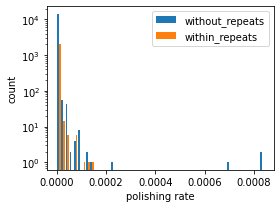

In [7]:
plt.figure(figsize=(4, 3))
plt.yscale("log")
plt.hist([df_without_repeats["rate"], df_within_repeats["rate"]], bins=50, label=["without_repeats","within_repeats"])
plt.xlabel("polishing rate")
plt.ylabel("count")
plt.legend()
plt.tight_layout()
plt.savefig("Figure_S6.pdf")

Next, let's do a t-test.

In [9]:
stats.ttest_ind(df_without_repeats["rate"], df_within_repeats["rate"], permutations=10000)

Ttest_indResult(statistic=-0.2849485963580353, pvalue=0.8515)